In [618]:
#read gender data
import pandas as pd

nameDF=pd.read_excel(r'C:\Users\Naim\name-gender-dataset.xlsx')
nameDF.head()

,Name,Gender
0,mary,F
1,anna,F
2,emma,F
3,elizabeth,F
4,minnie,F


In [619]:
#drop non values
nameDF=nameDF.dropna()

In [620]:
nameDF=nameDF[nameDF['Name']!=True]

In [621]:
#A function to to analyze a word and get the last letters in it to help get the correct classification

#In Chapter 4 of the NLTK book, we saw that male and female names have some distinctive characteristics.
#Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male.
#'https://www.kaggle.com/alvations/gender-identification-nltk-book-6-1-1-6-1-2'

def gender_features(word): 
#     print({'last_letter':word[-1]})
#     return {'last_letter':word[-1].lower()} 
    
    return {  
      'last_letter': word[-1].lower(),'last_two' : word[-2:].lower(),'last_is_vowel' : (word[-1].lower() in 'aeiou')
  }
nameDF.shape

(177456, 2)

In [622]:
# we use the feature extractor to process the names data. 
featuresets = [(gender_features(row['Name']), row['Gender']) for index, row in nameDF.iterrows()] 
print(len(featuresets))

177456


In [623]:
#build a classifier to model these differences more precisely.
import random 
from nltk.corpus import names 
import nltk 

#Splitting Data
train_set, test_set = featuresets[34000:], featuresets[:34000] 
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [626]:
# Load Data that contains all features of Doctors

import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Naim\Everything.csv', encoding="utf-8")

In [627]:
df

,ClinicianName,CategoryName,PatientGender,PatientMarital,PatientAge,ClinicianGender
0,HIBA DEMYATI,GENERAL MEDICINE,Female,Single,5,Female
1,HIBA DEMYATI,GENERAL MEDICINE,Female,Single,5,Female
2,HIBA DEMYATI,GENERAL MEDICINE,Female,Single,5,Female
3,Kavita Ramish Kumar,OBSTETRICS AND GYNAECOLOGY,Female,Married,25,Female
4,Saifeldin Nagmeldin Awad Mohamed Ali,GENERAL MEDICINE,Female,Married,53,Male
...,...,...,...,...,...,...
995046,Dr.SAJU ABDUL KHADER,DENTIST,Male,Married,52,Male
995047,MOHAMMED FAYEZ HAJIR,PEDIATRICS,Male,Single,2,Male
995048,MOHAMMED FAYEZ HAJIR,PEDIATRICS,Male,Single,2,Male
995049,MOHAMMED FAYEZ HAJIR,PEDIATRICS,Male,Single,2,Male


In [628]:
# A function to remove punctuation from Clinician name
def Remove_punctuation(word):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
    no_punc = ""
    for char in word:
       if char not in punctuations:
          no_punc = no_punc + char
    return no_punc

In [629]:
df['ClinicianName'] = df['ClinicianName'].astype(str)

In [630]:
# Getting out the first name only
df['ClinicianName'] = df['ClinicianName'].apply(lambda x: x.split()[0])

In [631]:
# Apply remove punctuations function
df['ClinicianName'] = df['ClinicianName'].apply(lambda x: Remove_punctuation(x))

In [632]:
# Getting ride of spaces in names
df['ClinicianName'] = df['ClinicianName'].str.strip()

In [634]:
# Getting out initial classifying for name based on nltk

def InitialClassify(word):
    result = classifier.classify(gender_features(word))
    return result

In [635]:
# Replacing each clinician name with its initial classifying

df['ClinicianName'] = df['ClinicianName'].apply(lambda x: InitialClassify(x))

In [638]:
#Rename ClinicianName column with processing one

df.rename(columns={'ClinicianName':'InitialClassifing'}, inplace=True)

In [639]:
df.dropna()

,InitialClassifing,CategoryName,PatientGender,PatientMarital,PatientAge,ClinicianGender
0,F,GENERAL MEDICINE,Female,Single,5,Female
1,F,GENERAL MEDICINE,Female,Single,5,Female
2,F,GENERAL MEDICINE,Female,Single,5,Female
3,F,OBSTETRICS AND GYNAECOLOGY,Female,Married,25,Female
4,M,GENERAL MEDICINE,Female,Married,53,Male
...,...,...,...,...,...,...
995046,F,DENTIST,Male,Married,52,Male
995047,M,PEDIATRICS,Male,Single,2,Male
995048,M,PEDIATRICS,Male,Single,2,Male
995049,M,PEDIATRICS,Male,Single,2,Male


In [640]:
# For encoding features we need

# An ordinal encoding involves mapping each unique label to an integer value.
#This type of encoding is really only appropriate if there is a known relationship between the categories.
#This relationship does exist for some of the variables in our dataset,
#and ideally, this should be harnessed when preparing the data.


#LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.
#If a label repeats it assigns the same value to as assigned earlier.


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [641]:
# applying Ordinal encoder on inputs [features]

enc = OrdinalEncoder()
df[["InitialClassifing","CategoryName","PatientGender", "PatientMarital"]] = enc.fit_transform(df[["InitialClassifing","CategoryName","PatientGender", "PatientMarital"]].astype(str))

In [642]:
# applying label encoder on output [target]

enc = LabelEncoder()
df['ClinicianGender'] = enc.fit_transform(df['ClinicianGender'])

In [643]:
df

,InitialClassifing,CategoryName,PatientGender,PatientMarital,PatientAge,ClinicianGender
0,0.0,9.0,0.0,2.0,5,0
1,0.0,9.0,0.0,2.0,5,0
2,0.0,9.0,0.0,2.0,5,0
3,0.0,14.0,0.0,1.0,25,0
4,1.0,9.0,0.0,1.0,53,1
...,...,...,...,...,...,...
995046,0.0,4.0,1.0,1.0,52,1
995047,1.0,18.0,1.0,2.0,2,1
995048,1.0,18.0,1.0,2.0,2,1
995049,1.0,18.0,1.0,2.0,2,1


In [944]:
df.CategoryName.unique()

array([ 9., 14., 18., 10., 12.,  2., 11., 16.,  5., 23.,  4.,  0.,  7.,
        6.,  8., 15., 19., 21., 20., 17., 22., 13.,  1.,  3.])

In [ ]:
df.

In [870]:
# The features to train on 
Features = ['InitialClassifing','CategoryName','PatientGender','PatientMarital','PatientAge','ClinicianGender']

In [871]:
# Determine the features we want to train the model on

dataset = df[Features].values

In [872]:
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]
#y=y.astype('int')
# format all fields as string
X = X.astype(str)
# reshape target to be a 2d array
y = y.reshape((len(y), 1))

In [873]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [874]:
X_test

array([['1.0', '18.0', '1.0', '2.0', '6.0'],
       ['0.0', '6.0', '0.0', '1.0', '38.0'],
       ['1.0', '9.0', '0.0', '1.0', '29.0'],
       ...,
       ['1.0', '9.0', '1.0', '1.0', '24.0'],
       ['1.0', '9.0', '0.0', '1.0', '38.0'],
       ['0.0', '14.0', '0.0', '1.0', '29.0']], dtype='<U32')

In [875]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (666684, 5) (666684, 1)
Test (328367, 5) (328367, 1)


In [876]:
#Model Training

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score we have achieved using Logistic Regression is: "+str(score_lr)+" %")

C:\Users\Naim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The accuracy score we have achieved using Logistic Regression is: 78.04 %


C:\Users\Naim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [877]:
from sklearn.ensemble import BaggingClassifier

BGC = BaggingClassifier()

BGC.fit(X_train,y_train) # model is trained

Y_pred_BGC = BGC.predict(X_test)
score_BGC = round(accuracy_score(Y_pred_BGC,y_test)*100,2)
print("The accuracy score we have achieved using Bagging Classifier is: "+str(score_BGC)+" %")

C:\Users\Naim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The accuracy score we have achieved using Bagging Classifier is: 81.64 %


C:\Users\Naim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature: 0, Score: -1.47135
Feature: 1, Score: -0.02855
Feature: 2, Score: -0.34914
Feature: 3, Score: 0.28017
Feature: 4, Score: 0.00415


C:\Users\Naim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


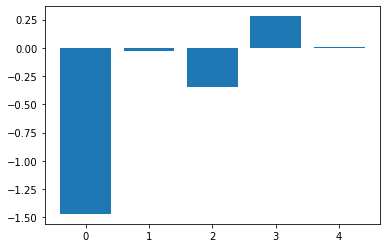

In [878]:
from matplotlib import pyplot
model = LogisticRegression()
# fit the model
model.fit(X_train,y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Please execute this code to predict the doctor's gender based on his name

In [1005]:
#Find Gender based on doctor name only

value = input("Please enter a doctor name:\n")

print(f'Predcited Gender {InitialClassify(value)}')

Please enter a doctor name:
Lina
Predcited Gender F


# The accuracy with Logistic Regression

# 78.05 % 1 featur (DoctorName only)

# 78.05 % 2 features (DoctorName,Category)

# 78.05 % 3 features (DoctorName,Category,PatientGender)

# 78.05% 4 features (DoctorName,Category,PatientGender,PatientMarital)

# 78.04 % % 5 features (DoctorName,Category,PatientGender,PatientMarital,PatientAge)

# The accuracy with Bagging Classifier

# 78.05 %    1 featur   (DoctorName only)

# 80.67 %    2 features (DoctorName,Category)

# 80.75 %    3 features (DoctorName,Category,PatientGender)

# 80.81 %    4 features (DoctorName,Category,PatientGender,PatientMarital)

# 81.64 %    5 features  (DoctorName,Category,PatientGender,PatientMarital,PatientAge)


In [ ]:
Categoris =['OBSTETRICS AND GYNAECOLOGY', 'GENERAL MEDICINE', 'PEDIATRICS',
       'CARDIOLOGY', 'ORTHOPEDICS', 'NEUROLOGY', 'ENT', 'OPHTHALMOLOGY',
       'DERMATOLOGY', 'DENTIST', 'GENERAL SURGERY', 'UROLOGY',
       'GASTROENTEROLOGY', 'ENDOCRINOLOGY', 'ALLIED HEALTH', 'NEPHROLOGY',
       'NURSE AND MIDWIFE', 'PSYCHIATRY', 'PATHOLOGY', 'RADIOLOGY',
       'RHEUMATOLOGY', 'PLASTIC SURGERY', 'PULMONOLOGY', 'ANESTHESIOLOGY',
        'ONCOLOGY', 'COMPLEMENTARY AND ALTERNATIVE MEDICINE]

In [991]:
# A helper function that plays the role of an encoder instead of ordinal encoder,
#because ordinal encoder does not encode a single row, but it requires many rows.

def manual_encoder(x):
    return {
        'GENERAL MEDICINE': 9.0,
        'OBSTETRICS AND GYNAECOLOGY':14.0,
        'PEDIATRICS':18.0,
        'GENERAL SURGERY':10.0,
        'NEUROLOGY':12.0,
        'CARDIOLOGY':2.0,
        'NEPHROLOGY':11.0,
        'ORTHOPEDICS':16.0,
        'DERMATOLOGY':5.0,
        'UROLOGY':23.0,
        'DENTIST':4.0,
        'ALLIED HEALTH':0.0,
        'ENT':7.0,
        'ENDOCRINOLOGY':6.0,
        'GASTROENTEROLOGY':8.0,
        'OPHTHALMOLOGY':15.0,
        'PLASTIC SURGERY':19.0,
        'RADIOLOGY':21.0,
        'PSYCHIATRY':20.0,
        'PATHOLOGY':17.0,
        'RHEUMATOLOGY':22.0,
        'NURSE AND MIDWIFE':13.0,
        'ANESTHESIOLOGY':1.0,
        'COMPLEMENTARY AND ALTERNATIVE MEDICINE':3.0,
        'Married':2.0,
        'Single':1.0,
        'Female':0.0,
        'Male':1.0,
        'F':0.0,
        'M':1.0,
        'OBSTETRICS AND GYNAECOLOGY':14.0,
        'OBSTETRICS AND GYNAECOLOGY':14.0,
         }.get(x, 0.0)    # 9 is default if x is not found
        

In [992]:
# An auxiliary function for converting a numeric result into a comprehensible result

def matcher(i):
    switcher={ 
        
            1: "Predcited gender : Male",
            
            0: "Predicted gender : Female",
            
             }
    return switcher.get(i,"unspecified")

In [993]:
# An auxiliary function to Convert a List to String
def converto(list):
      
    res = int("".join(map(str, list)))
      
    return res

# Please execute this code to predict the doctor's gender based on his available features

In [987]:
value1 = input("Please enter a doctor name:\n")
value2 = input("Please enter his category :\n")
value3 = input("Please enter his patient gender:\n")
value4 = input("Please enter his patient marital:\n")
value5 = input("Please enter his patient age:\n")

Lista = [manual_encoder(InitialClassify(value1)),manual_encoder(value2),manual_encoder(value3),manual_encoder(value4),manual_encoder(value5)]
X=np.array(Lista).reshape(1,-1)

new_predictions = BGC.predict(X)
ZZ=int(new_predictions) 
result= matcher(ZZ)

print(f'out of enc {result}')   

#Some examples for a quick test

#1 Naim,ENDOCRINOLOGY,Male,Married,32
#1 Rahaf,PSYCHIATRY,Male,Single,27
#1 Samer,GENERAL SURGERY,Male,Married,45
#1 Noor,GASTROENTEROLOGY,female,Single,21

Please enter a doctor name:
Ahmad
Please enter his category :
GASTROENTEROLOGY
Please enter his patient gender:
Male
Please enter his patient marital:
Married
Please enter his patient age:
21
out of enc Predcited gender : Male


In [996]:
value1 = input("Please enter a doctor name:\n")
value2 = input("Please enter his category :\n")
value3 = input("Please enter his patient gender:\n")
value4 = input("Please enter his patient marital:\n")
value5 = input("Please enter his patient age:\n")

Lista = [manual_encoder(InitialClassify(value1)),manual_encoder(value2),manual_encoder(value3),manual_encoder(value4),manual_encoder(value5)]
X=np.array(Lista).reshape(1,-1)

new_predictions = BGC.predict(X)
ZZ=int(new_predictions) 
result= matcher(ZZ)

print(f'out of enc {result}')   

#Some examples for a quick test

#1 Naim,ENDOCRINOLOGY,Male,Married,32
#1 Rahaf,PSYCHIATRY,Male,Single,27
#1 Samer,GENERAL SURGERY,Male,Married,45
#1 Noor,GASTROENTEROLOGY,female,Single,21

Please enter a doctor name:
Hiba
Please enter his category :
GASTROENTEROLOGY
Please enter his patient gender:
female
Please enter his patient marital:
Single
Please enter his patient age:
21
out of enc Predicted gender : Female


In [997]:
value1 = input("Please enter a doctor name:\n")
value2 = input("Please enter his category :\n")
value3 = input("Please enter his patient gender:\n")
value4 = input("Please enter his patient marital:\n")
value5 = input("Please enter his patient age:\n")

Lista = [manual_encoder(InitialClassify(value1)),manual_encoder(value2),manual_encoder(value3),manual_encoder(value4),manual_encoder(value5)]
X=np.array(Lista).reshape(1,-1)

new_predictions = BGC.predict(X)
ZZ=int(new_predictions) 
result= matcher(ZZ)

print(f'out of enc {result}')   

#Some examples for a quick test

#1 Naim,ENDOCRINOLOGY,Male,Married,32
#1 Rahaf,PSYCHIATRY,Male,Single,27
#1 Samer,GENERAL SURGERY,Male,Married,45
#1 Noor,GASTROENTEROLOGY,female,Single,21

Please enter a doctor name:
Ahmad
Please enter his category :
PSYCHIATRY
Please enter his patient gender:
Male
Please enter his patient marital:
Single
Please enter his patient age:
27
out of enc Predcited gender : Male


In [999]:
value1 = input("Please enter a doctor name:\n")
value2 = input("Please enter his category :\n")
value3 = input("Please enter his patient gender:\n")
value4 = input("Please enter his patient marital:\n")
value5 = input("Please enter his patient age:\n")

Lista = [manual_encoder(InitialClassify(value1)),manual_encoder(value2),manual_encoder(value3),manual_encoder(value4),manual_encoder(value5)]
X=np.array(Lista).reshape(1,-1)

new_predictions = BGC.predict(X)
ZZ=int(new_predictions) 
result= matcher(ZZ)

print(f'out of enc {result}')   

#Some examples for a quick test

#1 Naim,ENDOCRINOLOGY,Male,Married,32
#1 Rahaf,PSYCHIATRY,Male,Single,27
#1 Samer,GENERAL SURGERY,Male,Married,45
#1 Noor,GASTROENTEROLOGY,female,Single,21

Please enter a doctor name:
Issa
Please enter his category :
GENERAL SURGERY
Please enter his patient gender:
Male
Please enter his patient marital:
Married
Please enter his patient age:
43
out of enc Predcited gender : Male
